# Logistic regression model

Like the classification that we will perform with respect to the text based on a wide set of characteristics, in which we have a binary type output, this is true article and false article. That is why we can use a model such as Logistic Regression. As we know, this model provides the intuitive equation to classify problems into binary or multiple classes.

To do this, we can perform hyperparameter adjustments to obtain the best result for all individual data sets, while testing multiple parameters before acquiring the maximum accuracies of the logistic regression model.

***

## Index

1. [Import libraries](#Import-the-libraries)
2. [Load datasets](#Load-the-dataset's)
    - [Data visualization](#Dataframe-visualization)
    - [Dataset information](#Info.-about-the-datasets)
3. [Data Preparation](#Data-preparation)
    - [Dataframe concatenation](#Concant-both-dataframes)
    - [Merge data](#Merge-the-data)
4. [Data cleaning](#Data-cleaning)
    - [Punctuation](#Removing-punctuation)
    - [Stopwords](#Removing-stopwords)
        - [About stopwords](#StopWords)
5. [EDA](#Data-exploration)
    - [Distribution](#New's-distribution)
    - [WordCloud](#WordCloud)
    - [Common words](#Most-common-words)

6. [Modeling](#Modeling)

***

### Import the libraries

In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Load the dataset's

In [14]:
dfFake = pd.read_csv('data/Fake.csv')
dfTrue = pd.read_csv('data/True.csv')

In [15]:
dfFake.shape

(23481, 4)

In [16]:
dfTrue.shape

(21417, 4)

#### Dataframe visualization

In [17]:
dfFake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [18]:
dfTrue.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### Info. about the datasets

In [19]:
dfFake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 367.0+ KB


In [20]:
dfTrue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 334.7+ KB


### Data preparation

We will assign each of our dataframes an extra column with which we can identify the target variable, in this case if it is *real* (1) and if it is *fake* (0). So it will be possible to perform a binary classification.

In [21]:
dfFake['target'] = 1
dfTrue['target'] = 0

We will inspect the dataframes to visualize the change made

In [22]:
dfFake.head(2)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1


In [23]:
dfTrue.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0


#### Concant both dataframes

In [25]:
concatData = pd.concat([dfFake, dfTrue]).reset_index(drop=True)

In [26]:
concatData.shape

(44898, 5)

#### Merge the data

In [27]:
from sklearn.utils import shuffle

mergeData = shuffle(concatData)
mergeData = mergeData.reset_index(drop=True)

We check if the data has been mixed correctly

In [28]:
mergeData.head()

,title,text,subject,date,target
0,WOW! HILLARY PRETENDED To Be Relaxing…But She’...,Democratic Party presidential nominee Hillary ...,politics,"Nov 26, 2016",1
1,Egypt court sentences Mursi to 25 years in Qat...,CAIRO (Reuters) - An Egyptian court on Saturda...,worldnews,"September 16, 2017",0
2,THEY KNEW! CLOSE CLINTON FRIEND Warned Against...,"In June of 2016, the disgraced sexual predator...",politics,"Oct 18, 2017",1
3,Russia's Putin hosts Assad in fresh drive for ...,MOSCOW/BEIRUT (Reuters) - Russian President Vl...,worldnews,"November 21, 2017",0
4,Brazil speaker says pension overhaul in danger...,BRASILIA (Reuters) - The Brazilian government ...,worldnews,"November 17, 2017",0


### Data cleaning

We will remove some of the columns that are not necessary to perform the classifier. This is because of how the data sets are.

In [29]:
mergeData.drop(['date'],axis=1,inplace=True)
mergeData.drop(['title'], axis=1, inplace=True)

mergeData.head()

,text,subject,target
0,Democratic Party presidential nominee Hillary ...,politics,1
1,CAIRO (Reuters) - An Egyptian court on Saturda...,worldnews,0
2,"In June of 2016, the disgraced sexual predator...",politics,1
3,MOSCOW/BEIRUT (Reuters) - Russian President Vl...,worldnews,0
4,BRASILIA (Reuters) - The Brazilian government ...,worldnews,0


We will transform all the text to lowercase

In [30]:
mergeData['text'] = mergeData['text'].apply(lambda x : x.lower())

mergeData.head()

,text,subject,target
0,democratic party presidential nominee hillary ...,politics,1
1,cairo (reuters) - an egyptian court on saturda...,worldnews,0
2,"in june of 2016, the disgraced sexual predator...",politics,1
3,moscow/beirut (reuters) - russian president vl...,worldnews,0
4,brasilia (reuters) - the brazilian government ...,worldnews,0


#### Removing punctuation

In [31]:
import string 

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [32]:
mergeData['text'] = mergeData['text'].apply(punctuation_removal)

In [33]:
mergeData.head()

,text,subject,target
0,democratic party presidential nominee hillary ...,politics,1
1,cairo reuters an egyptian court on saturday s...,worldnews,0
2,in june of 2016 the disgraced sexual predator ...,politics,1
3,moscowbeirut reuters russian president vladim...,worldnews,0
4,brasilia reuters the brazilian government s p...,worldnews,0


#### Removing stopwords

The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.

##### StopWords

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Sebastián
[nltk_data]     Marroquín\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [35]:
mergeData['text'] = mergeData['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

mergeData.head()

,text,subject,target
0,democratic party presidential nominee hillary ...,politics,1
1,cairo reuters egyptian court saturday sentence...,worldnews,0
2,june 2016 disgraced sexual predator hollywood ...,politics,1
3,moscowbeirut reuters russian president vladimi...,worldnews,0
4,brasilia reuters brazilian government plan ove...,worldnews,0


***

### Data exploration

#### New's distribution

##### News distribution by target

In [38]:
print(mergeData.groupby(['target'])['text'].count())

target
0    21417
1    23481
Name: text, dtype: int64


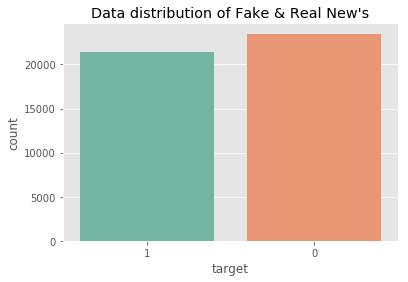

In [41]:
axis = sns.countplot(x='target', data=mergeData, palette='Set2')
axis.set(xticklabels = [1, 0])
plt.title("Data distribution of Fake & Real New's")
plt.show()

##### News distribution by subject

In [39]:
print(mergeData.groupby(['subject'])['text'].count())

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


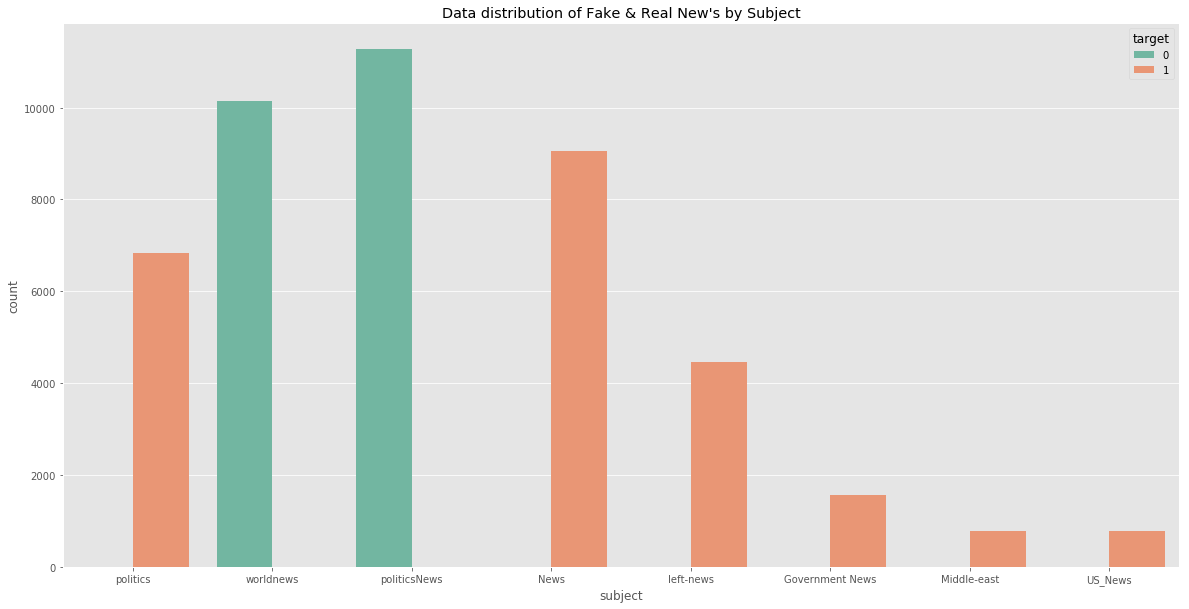

In [42]:
plt.figure(figsize=(20,10))
axis = sns.countplot(x='subject', hue='target', data=mergeData, palette='Set2')
plt.title("Data distribution of Fake & Real New's by Subject")
plt.show()

#### WordCloud

##### WordCloud - Fake new's

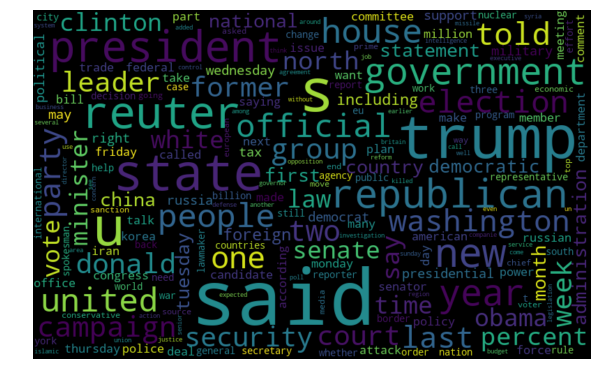

In [44]:
from wordcloud import WordCloud

fake_data = mergeData[mergeData["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### WordCloud - Real new's

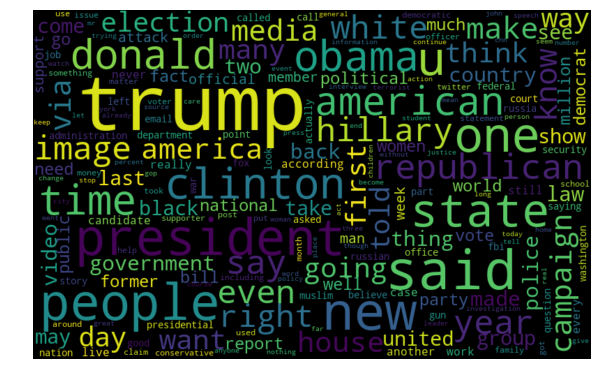

In [45]:
from wordcloud import WordCloud

fake_data = mergeData[mergeData["target"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Most common words

In [46]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette='Set2')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

##### Frequent word's in Fake new's

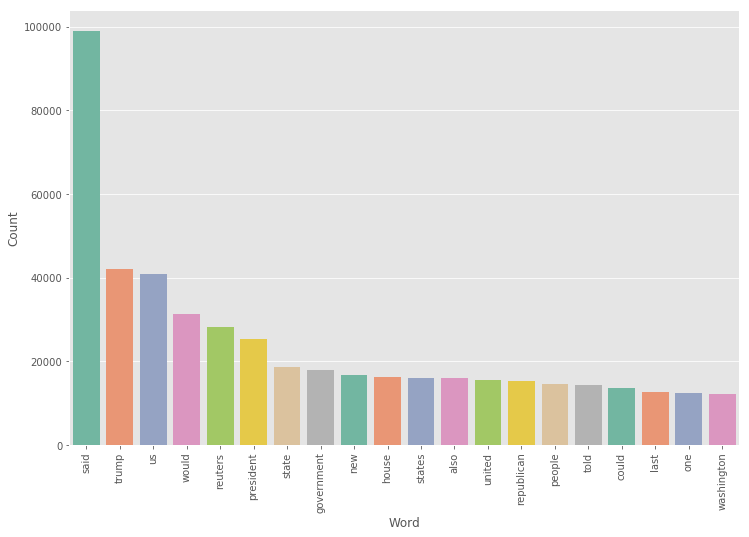

In [47]:
counter(mergeData[mergeData["target"] == 0], "text", 20)

##### Frequent word's in Real new's

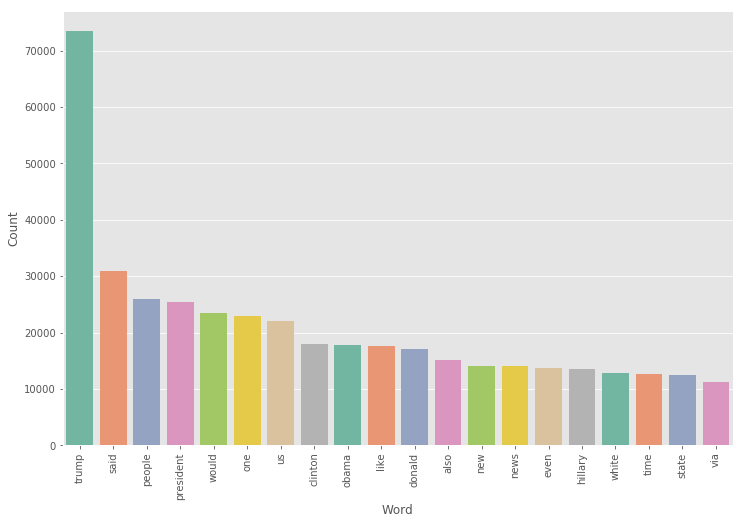

In [48]:
counter(mergeData[mergeData["target"] == 1], "text", 20)

***

### Model building in Scikit-learn

#### [Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [49]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(mergeData['text'], mergeData.target, test_size=0.2, random_state=42)

#### Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

##### Linear Regression Equation:

![eq1](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image1_ga8gze.png)

Where, y is dependent variable and $$x_{1}, x_{2} ..., X_{n}$$ are explanatory variables.

##### Sigmoid Function:

![eq2](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image2_kwxquj.png)

Apply Sigmoid function on linear regression:

![eq3](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image3_qldafx.png)

##### Properties of Logistic Regression:

- The dependent variable in logistic regression follows Bernoulli Distribution.
- Estimation is done through maximum likelihood.
- No R Square, Model fitness is calculated through Concordance, KS-Statistics.

#### Model Development and Prediction

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [62]:
pipeline = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', logreg)])

# Fitting the model
model = pipeline.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.73%


##### Plot confusion matrix

Confusion matrix, without normalization


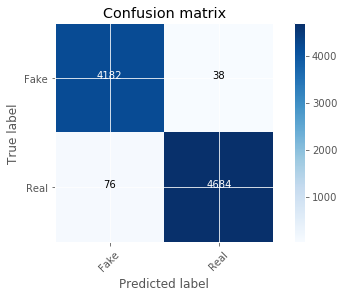

In [63]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])